In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from utils import *

path_data = "/Users/peter/Work/radiography/data/"
path = "/Users/peter/Work/semiempirical_transparency/"
outfile = path + "paper/figs/"

H = "10"
L = "6"
H_twiddle = "9.7"
L_twiddle = "6.3"

### Loading simulation parameters

In [2]:
phi_H = np.load(path_data + "phi_%sMeV_10.npy" % H)
phi_L = np.load(path_data + "phi_%sMeV_10.npy" % L)
phi_H_twiddle = np.load(path_data + "phi_%sMeV_10.npy" % H_twiddle)
phi_L_twiddle = np.load(path_data + "phi_%sMeV_10.npy" % L_twiddle)
 
D = np.load(path_data + "D_10.npy")
E = np.load(path_data + "E_10.npy")
D_twiddle = approxDetectorResponse(E)

lmbda_range = np.linspace(0, 500, 101)
Z_range = np.arange(1, 101)
Z_plot = np.array([1, 13, 26, 47, 64, 82, 92])
mu_tot = calcMu_tot(E, Z_range)
mu_PE = calcMu_PE(E, Z_range)
mu_CS = calcMu_CS(E, Z_range)
mu_PP = calcMu_PP(E, Z_range)
    
norm = mpl.colors.Normalize(vmin=Z_range[0], vmax=Z_range[-1])
colormap = mpl.colormaps["viridis"]
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=colormap)
color = lambda Z: cmap.to_rgba(Z)
xrange = [0, 10]
yrange = [-2, 0]
xticks = np.arange(11)
yticks = np.linspace(np.ceil(2*yrange[0])/2, np.floor(2*yrange[1])/2, int(2*(yrange[1] - yrange[0]) + 1))

### Adding Compound Materials

In [3]:
compound_material = {}
compound_Z = {}
compound_w = {}
compound_c = {}

compound_material[101] = r"CH${}_2$"
compound_Z[101] = np.array([1, 6])
compound_w[101] = np.array([0.143711, 0.856289])
compound_c[101] = color(6)

compound_material[102] = r"Al${}_2$O${}_3$"
compound_Z[102] = np.array([8, 13])
compound_w[102] = np.array([0.470749, 0.529251])
compound_c[102] = color(13)

compound_material[103] = r"AgCl"
compound_Z[103] = np.array([17, 47])
compound_w[103] = np.array([0.247368, 0.752632])
compound_c[103] = color(47)

compound_material[104] = r"LiI"
compound_Z[104] = np.array([3, 53])
compound_w[104] = np.array([0.051858, 0.948142])
compound_c[104] = color(53)

compound_material[105] = r"CdWO${}_4$"
compound_Z[105] = np.array([8, 48, 74])
compound_w[105] = np.array([0.177644, 0.312027, 0.510329])
compound_c[105] = color(74)

compound_material[106] = r"Lead Glass"
compound_Z[106] = np.array([8, 14, 22, 33, 82])
compound_w[106] = np.array([0.156453, 0.080866, 0.008092, 0.002651, 0.751938])
compound_c[106] = color(82)

compound_material[107] = r"UO${}_2$"
compound_Z[107] = np.array([8, 92])
compound_w[107] = np.array([0.118502, 0.881498])
compound_c[107] = color(92)

### Loading simulated data

In [4]:
### Calibration data
lookup_alpha_calib = calcLookupTables("calib")
Z_arr_calib, Z_vals_calib, Z_compound_calib, alpha_H_calib, alpha_L_calib, sigma_H_calib, sigma_L_calib, lmbda_H_calib, lmbda_L_calib = extractFromTables(lookup_alpha_calib, H, L)

### Test data
lookup_alpha = calcLookupTables("test")
Z_arr, Z_vals, Z_compound, alpha_H_arr, alpha_L_arr, sigma_H_arr, sigma_L_arr, lmbda_H_arr, lmbda_L_arr = extractFromTables(lookup_alpha, H, L)

### Results Summary

Minimum found at a = 1.1158, b = 0.9616, c = 0.9973 with a loss of 9.815e-14
Minimum found at a = 0.9427, b = 0.9687, c = 0.9984 with a loss of 5.577e-10
Minimum found at a = 1.0659, b = 0.9788, c = 1.0031 with a loss of 5.919e-10
Minimum found at a = 1.1224, b = 1.0343, c = 0.9089 with a loss of 4.273e-12


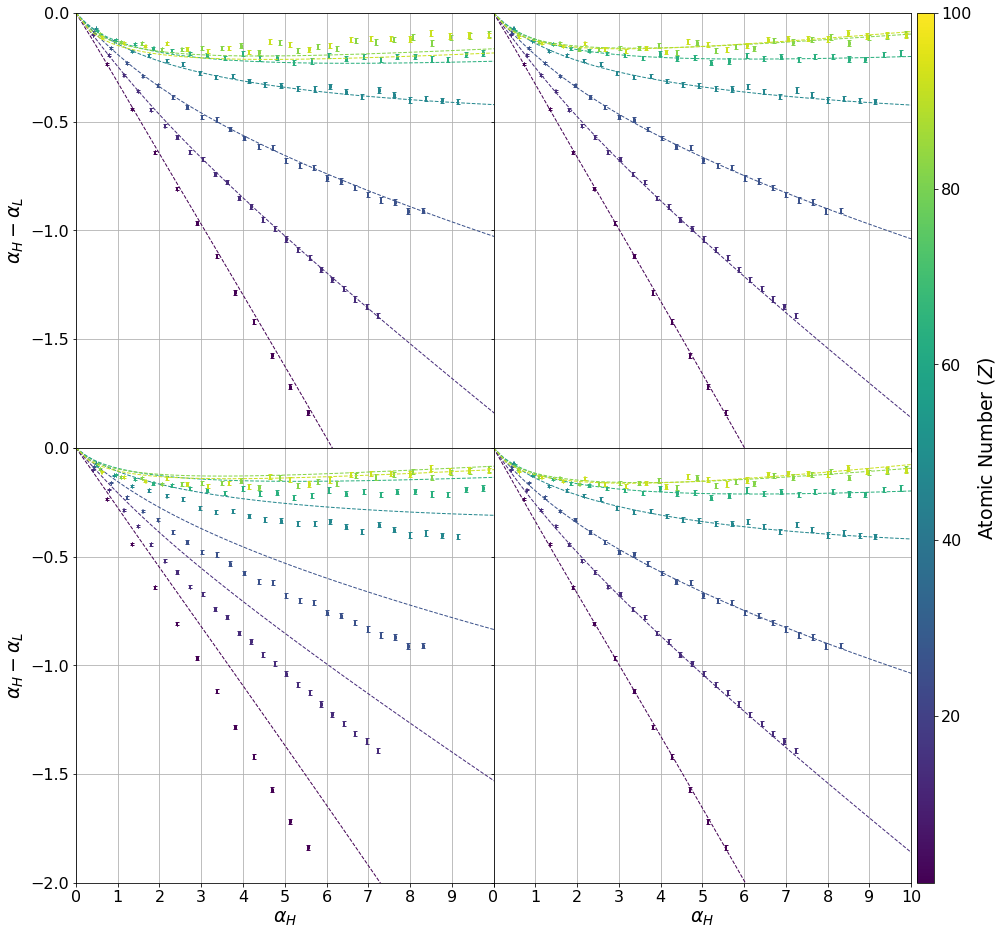

In [5]:
a_H, b_H, c_H = fitSemiempirical(alpha_H_calib, lmbda_H_calib, Z_arr_calib, phi_H, D, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
a_L, b_L, c_L = fitSemiempirical(alpha_L_calib, lmbda_L_calib, Z_arr_calib, phi_L, D, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
mu_H = mu_tot + (a_H-1)*mu_PE + (b_H-1)*mu_CS + (c_H-1)*mu_PP
mu_L = mu_tot + (a_L-1)*mu_PE + (b_L-1)*mu_CS + (c_L-1)*mu_PP

a_H, b_H, c_H = fitSemiempirical(alpha_H_calib, lmbda_H_calib, Z_arr_calib, phi_H_twiddle, D_twiddle, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
a_L, b_L, c_L = fitSemiempirical(alpha_L_calib, lmbda_L_calib, Z_arr_calib, phi_L_twiddle, D_twiddle, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
mu_H_twiddle = mu_tot + (a_H-1)*mu_PE + (b_H-1)*mu_CS + (c_H-1)*mu_PP
mu_L_twiddle = mu_tot + (a_L-1)*mu_PE + (b_L-1)*mu_CS + (c_L-1)*mu_PP

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = [16, 16], sharex = True, sharey = True)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax11.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                  yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                  elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
    ax12.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                  yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                  elinewidth=2, capsize=2, ecolor = color(Z), ls='none') 
    ax21.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
    ax22.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none') 
    
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L, D, mu_tot, Z_range)        
    ax11.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))
    
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_H, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L, D, mu_L, Z_range)        
    ax12.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))
    
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H_twiddle, D_twiddle, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L_twiddle, D_twiddle, mu_tot, Z_range)        
    ax21.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))
    
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H_twiddle, D_twiddle, mu_H_twiddle, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L_twiddle, D_twiddle, mu_L_twiddle, Z_range)        
    ax22.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

ax11.set_xlim(xrange)
ax11.set_ylim(yrange)
ax11.set_xticks(xticks)
ax11.set_yticks(yticks)

plt.setp(ax11.get_yticklabels()[0], visible=False)
plt.setp(ax21.get_xticklabels()[-1], visible=False)

ax11.tick_params(labelsize=16)
ax12.tick_params(labelsize=16)
ax21.tick_params(labelsize=16)
ax22.tick_params(labelsize=16)
ax11.grid()
ax12.grid()
ax21.grid()
ax22.grid()
ax21.set_xlabel(r"$\alpha_H$", fontsize=19)
ax22.set_xlabel(r"$\alpha_H$", fontsize=19)
ax11.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
ax21.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.015, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

#plt.savefig(outfile + "alpha_curve_2x2.pdf", bbox_inches = "tight")

### Plotting simulated data against the free streaming model

Bias_H = 0.116
Bias_L = 0.132


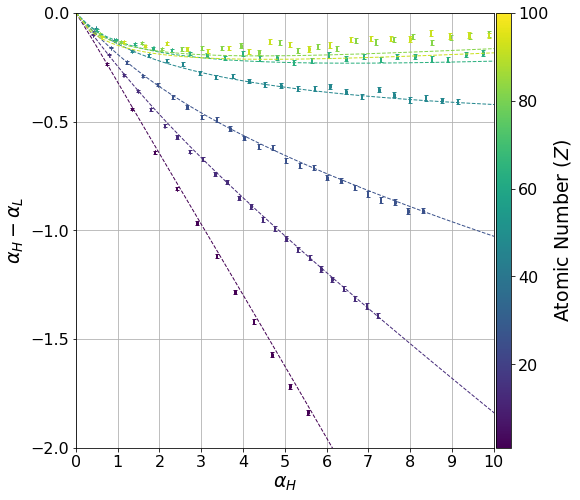

In [6]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L, D, mu_tot, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

bias_H = calcBias(alpha_H_arr, sigma_H_arr, lmbda_H_arr, Z_arr, phi_H, D, mu_tot, Z_range)
bias_L = calcBias(alpha_L_arr, sigma_L_arr, lmbda_L_arr, Z_arr, phi_L, D, mu_tot, Z_range)
print("Bias_H = %.3g" % bias_H)
print("Bias_L = %.3g" % bias_L)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "alpha_curve_freestreaming.pdf", bbox_inches = "tight")

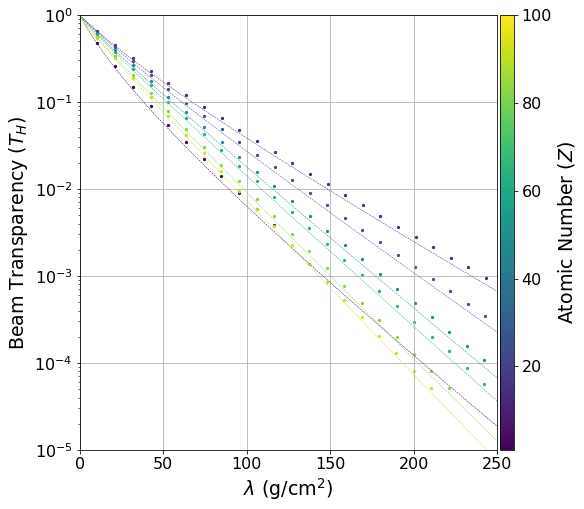

In [7]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    ax.scatter(lmbda_H, np.exp(-alpha_H), s=5, color = color(Z))
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_tot, Z_range)
    ax.plot(lmbda_range, np.exp(-alpha_H0), linewidth = 0.5, linestyle = 'dashed', c=color(Z))

ax.set_xlim([0, 250])
ax.set_ylim([1e-5, 1])
ax.semilogy()
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\lambda$ (g/cm${}^2$)", fontsize=19)
ax.set_ylabel(r"Beam Transparency ($T_H$)", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "T_H_lambda_freestreaming.pdf", bbox_inches = "tight")

### Z of best fit

True Z: 1; Fit Z: [1]; Loss: [0.00037824]
True Z: 6; Fit Z: [6]; Loss: [0.00010093]
True Z: 13; Fit Z: [13]; Loss: [5.06959847e-05]
True Z: 20; Fit Z: [20]; Loss: [6.00047824e-05]
True Z: 26; Fit Z: [26]; Loss: [6.70254511e-05]
True Z: 32; Fit Z: [32]; Loss: [6.56304638e-05]
True Z: 40; Fit Z: [40]; Loss: [0.00010721]
True Z: 47; Fit Z: [48]; Loss: [5.04043644e-05]
True Z: 55; Fit Z: [57]; Loss: [3.42886529e-05]
True Z: 64; Fit Z: [69 91]; Loss: [4.76241221e-05 1.25023309e-04]
True Z: 74; Fit Z: [80]; Loss: [0.00065502]
True Z: 82; Fit Z: [80]; Loss: [0.00098624]
True Z: 92; Fit Z: [80]; Loss: [0.00129162]


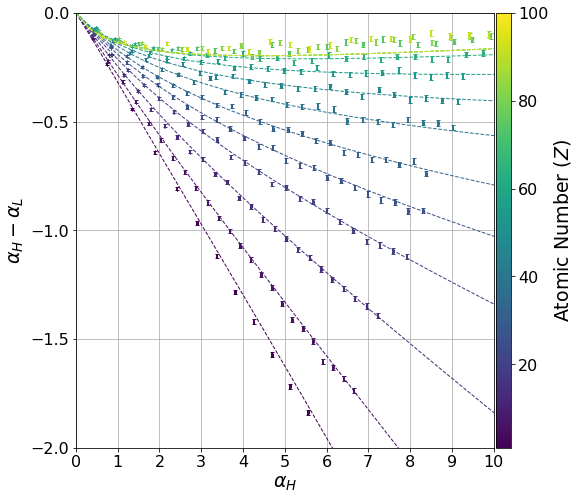

In [8]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_vals:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    Z_fit, loss_fit = fitToTheory(alpha_H, alpha_L, phi_H, phi_L, D, mu_tot, mu_tot, Z_range)
    print("True Z: %d; Fit Z: %s; Loss: %s" % (Z, Z_fit, loss_fit))
    
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_H, D, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_L, D, mu_tot, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

### Semiempirical mass attenuation coefficient

Minimum found at a = 1.1158, b = 0.9616, c = 0.9973 with a loss of 9.815e-14
Minimum found at a = 0.9427, b = 0.9687, c = 0.9984 with a loss of 5.577e-10
Bias_H = 0.0136
Bias_L = 0.0117


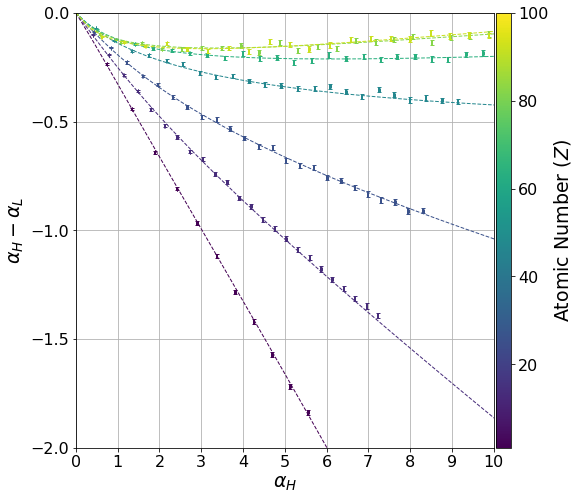

In [9]:
a_H, b_H, c_H = fitSemiempirical(alpha_H_calib, lmbda_H_calib, Z_arr_calib, phi_H, D, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
a_L, b_L, c_L = fitSemiempirical(alpha_L_calib, lmbda_L_calib, Z_arr_calib, phi_L, D, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
mu_H = mu_tot + (a_H-1)*mu_PE + (b_H-1)*mu_CS + (c_H-1)*mu_PP
mu_L = mu_tot + (a_L-1)*mu_PE + (b_L-1)*mu_CS + (c_L-1)*mu_PP

fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_H, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L, D, mu_L, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

    
bias_H = calcBias(alpha_H_arr, sigma_H_arr, lmbda_H_arr, Z_arr, phi_H, D, mu_H, Z_range)
bias_L = calcBias(alpha_L_arr, sigma_L_arr, lmbda_L_arr, Z_arr, phi_L, D, mu_L, Z_range)
print("Bias_H = %.3g" % bias_H)
print("Bias_L = %.3g" % bias_L)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "alpha_curve_semiempirical.pdf", bbox_inches = "tight")

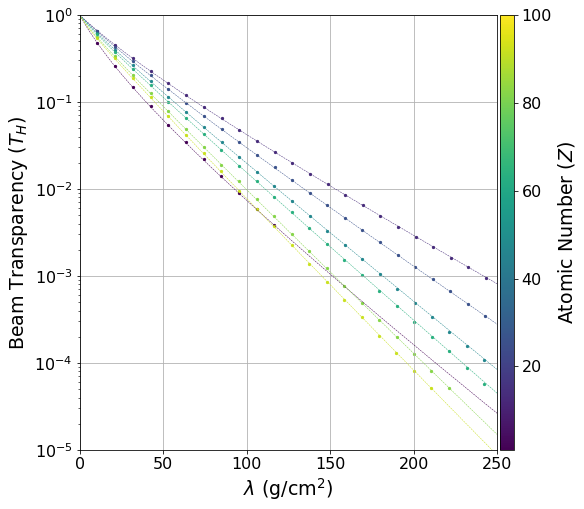

In [10]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    #ax.errorbar(lmbda_H, alpha_H, yerr = sigma_H, 
    #             elinewidth=2, capsize=1, ecolor = color(Z), ls='none')
    ax.scatter(lmbda_H, np.exp(-alpha_H), s=5, color = color(Z))
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H, D, mu_H, Z_range)
    ax.plot(lmbda_range, np.exp(-alpha_H0), linewidth = 0.5, linestyle = 'dashed', c=color(Z))

ax.set_xlim([0, 250])
ax.set_ylim([1e-5, 1])
ax.semilogy()
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\lambda$ (g/cm${}^2$)", fontsize=19)
ax.set_ylabel(r"Beam Transparency ($T_H$)", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "T_H_lambda_semiempirical.pdf", bbox_inches = "tight")

### Z of best fit using semiempirical parameters

True Z: 1; Fit Z: [1]; Loss: [3.7738748e-05]
True Z: 6; Fit Z: [6]; Loss: [7.12979606e-05]
True Z: 13; Fit Z: [13]; Loss: [6.04617215e-05]
True Z: 20; Fit Z: [20]; Loss: [6.64579912e-05]
True Z: 26; Fit Z: [26]; Loss: [3.97576826e-05]
True Z: 32; Fit Z: [32]; Loss: [7.32068056e-05]
True Z: 40; Fit Z: [41]; Loss: [9.76210253e-05]
True Z: 47; Fit Z: [48]; Loss: [5.08859443e-05]
True Z: 55; Fit Z: [56]; Loss: [2.97479505e-05]
True Z: 64; Fit Z: [64]; Loss: [4.21391255e-05]
True Z: 74; Fit Z: [76 99]; Loss: [8.67671706e-05 1.07548997e-04]
True Z: 82; Fit Z: [81 95]; Loss: [7.03674568e-05 7.34556642e-05]
True Z: 92; Fit Z: [90]; Loss: [7.40223653e-05]


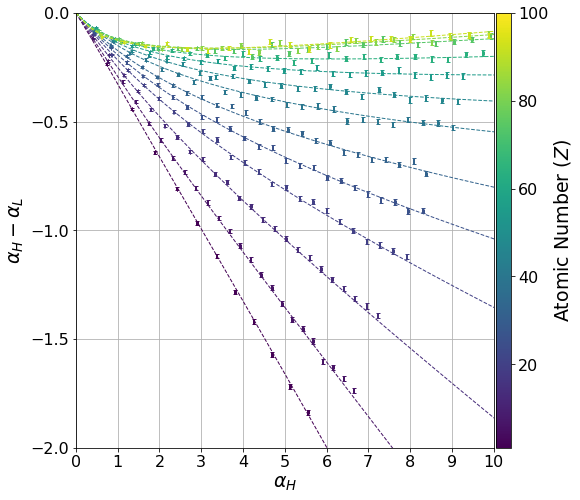

In [11]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_vals:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
    
    Z_fit, loss_fit = fitToTheory(alpha_H, alpha_L, phi_H, phi_L, D, mu_H, mu_L, Z_range)
    print("True Z: %d; Fit Z: %s; Loss: %s" % (Z, Z_fit, loss_fit))
    
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_H, D, mu_H, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_L, D, mu_L, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

### Mismatched parameters, free streaming

Bias_H = 0.0598
Bias_L = 0.0606


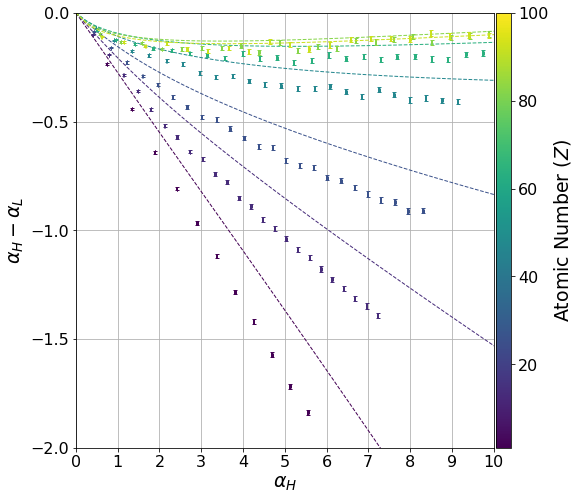

In [12]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H_twiddle, D_twiddle, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L_twiddle, D_twiddle, mu_tot, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

bias_H = calcBias(alpha_H_arr, sigma_H_arr, lmbda_H_arr, Z_arr, phi_H_twiddle, D_twiddle, mu_tot, Z_range)
bias_L = calcBias(alpha_L_arr, sigma_L_arr, lmbda_L_arr, Z_arr, phi_L_twiddle, D_twiddle, mu_tot, Z_range)
print("Bias_H = %.3g" % bias_H)
print("Bias_L = %.3g" % bias_L)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "alpha_curve_freestreaming_mismatched.pdf", bbox_inches = "tight")

True Z: 1; Fit Z: [1]; Loss: [0.01762697]
True Z: 6; Fit Z: [1]; Loss: [0.00039248]
True Z: 13; Fit Z: [8]; Loss: [0.00027171]
True Z: 20; Fit Z: [15]; Loss: [0.00020679]
True Z: 26; Fit Z: [20]; Loss: [0.00019051]
True Z: 32; Fit Z: [26]; Loss: [0.00014428]
True Z: 40; Fit Z: [34]; Loss: [0.00022381]
True Z: 47; Fit Z: [40]; Loss: [0.00013354]
True Z: 55; Fit Z: [47]; Loss: [0.00012855]
True Z: 64; Fit Z: [55]; Loss: [0.00014909]
True Z: 74; Fit Z: [64 98]; Loss: [0.00026954 0.00013726]
True Z: 82; Fit Z: [67 96]; Loss: [0.00027146 0.00013861]
True Z: 92; Fit Z: [69 94]; Loss: [0.00028874 0.00016322]


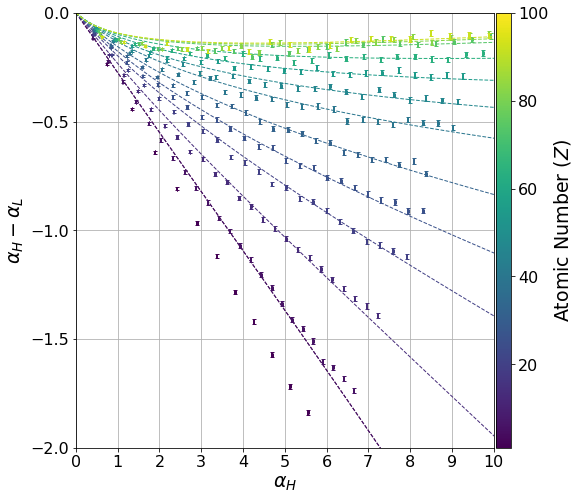

In [13]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_vals:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    Z_fit, loss_fit = fitToTheory(alpha_H, alpha_L, phi_H_twiddle, phi_L_twiddle, D_twiddle, mu_tot, mu_tot, Z_range)
    print("True Z: %d; Fit Z: %s; Loss: %s" % (Z, Z_fit, loss_fit))
    
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_H_twiddle, D_twiddle, mu_tot, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_L_twiddle, D_twiddle, mu_tot, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

### Mismatched parameters, semiempirical

Minimum found at a = 1.0659, b = 0.9788, c = 1.0031 with a loss of 5.919e-10
Minimum found at a = 1.1224, b = 1.0343, c = 0.9089 with a loss of 4.273e-12
Bias_H = 0.0119
Bias_L = 0.0125


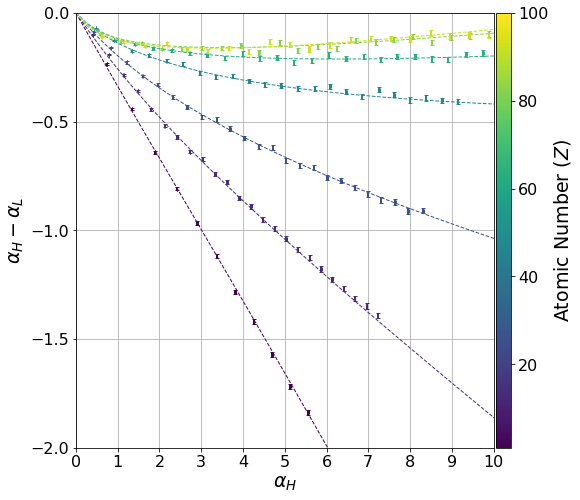

In [14]:
fig, ax = plt.subplots(1, figsize = [8, 8])

a_H, b_H, c_H = fitSemiempirical(alpha_H_calib, lmbda_H_calib, Z_arr_calib, phi_H_twiddle, D_twiddle, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
a_L, b_L, c_L = fitSemiempirical(alpha_L_calib, lmbda_L_calib, Z_arr_calib, phi_L_twiddle, D_twiddle, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)

mu_H = mu_tot + (a_H-1)*mu_PE + (b_H-1)*mu_CS + (c_H-1)*mu_PP
mu_L = mu_tot + (a_L-1)*mu_PE + (b_L-1)*mu_CS + (c_L-1)*mu_PP

for Z in Z_plot:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z], phi_H_twiddle, D_twiddle, mu_H, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z], phi_L_twiddle, D_twiddle, mu_L, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

bias_H = calcBias(alpha_H_arr, sigma_H_arr, lmbda_H_arr, Z_arr, phi_H_twiddle, D_twiddle, mu_H, Z_range)
bias_L = calcBias(alpha_L_arr, sigma_L_arr, lmbda_L_arr, Z_arr, phi_L_twiddle, D_twiddle, mu_L, Z_range)
print("Bias_H = %.3g" % bias_H)
print("Bias_L = %.3g" % bias_L)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

plt.savefig(outfile + "alpha_curve_semiempirical_mismatched.pdf", bbox_inches = "tight")

True Z: 1; Fit Z: [1]; Loss: [4.37066504e-05]
True Z: 6; Fit Z: [6]; Loss: [7.99803117e-05]
True Z: 13; Fit Z: [13]; Loss: [6.43370345e-05]
True Z: 20; Fit Z: [20]; Loss: [7.0911275e-05]
True Z: 26; Fit Z: [26]; Loss: [4.23066375e-05]
True Z: 32; Fit Z: [32]; Loss: [7.21710778e-05]
True Z: 40; Fit Z: [41]; Loss: [0.00010317]
True Z: 47; Fit Z: [48]; Loss: [5.77717239e-05]
True Z: 55; Fit Z: [56]; Loss: [3.39453645e-05]
True Z: 64; Fit Z: [64]; Loss: [4.1532502e-05]
True Z: 74; Fit Z: [ 76 100]; Loss: [9.41039279e-05 1.34133124e-04]
True Z: 82; Fit Z: [80 97]; Loss: [7.75656192e-05 8.58888188e-05]
True Z: 92; Fit Z: [85 94]; Loss: [8.39239756e-05 8.44266285e-05]


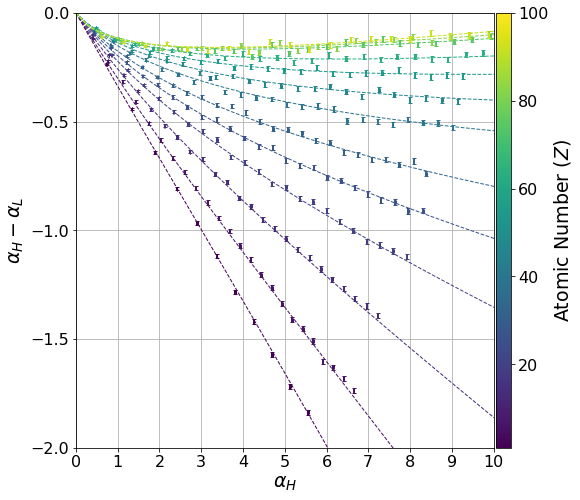

In [15]:
fig, ax = plt.subplots(1, figsize = [8, 8])

for Z in Z_vals:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = color(Z), ls='none')
        
    Z_fit, loss_fit = fitToTheory(alpha_H, alpha_L, phi_H_twiddle, phi_L_twiddle, D_twiddle, mu_H, mu_L, Z_range)
    print("True Z: %d; Fit Z: %s; Loss: %s" % (Z, Z_fit, loss_fit))
    
    ### plot against theory
    alpha_H0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_H_twiddle, D_twiddle, mu_H, Z_range)
    alpha_L0 = calcAlpha(lmbda_range, [Z_fit[0]], phi_L_twiddle, D_twiddle, mu_L, Z_range)        
    ax.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', c=color(Z))

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.tick_params(labelsize=16)
ax.grid()
ax.set_xlabel(r"$\alpha_H$", fontsize=19)
ax.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.855, 0.125, 0.025, 0.755])
fig.colorbar(cmap, cax=cbar_ax)
cbar_ax.set_ylabel(r"Atomic Number ($Z$)", fontsize=19)
cbar_ax.tick_params(labelsize=16)

### Compound Materials

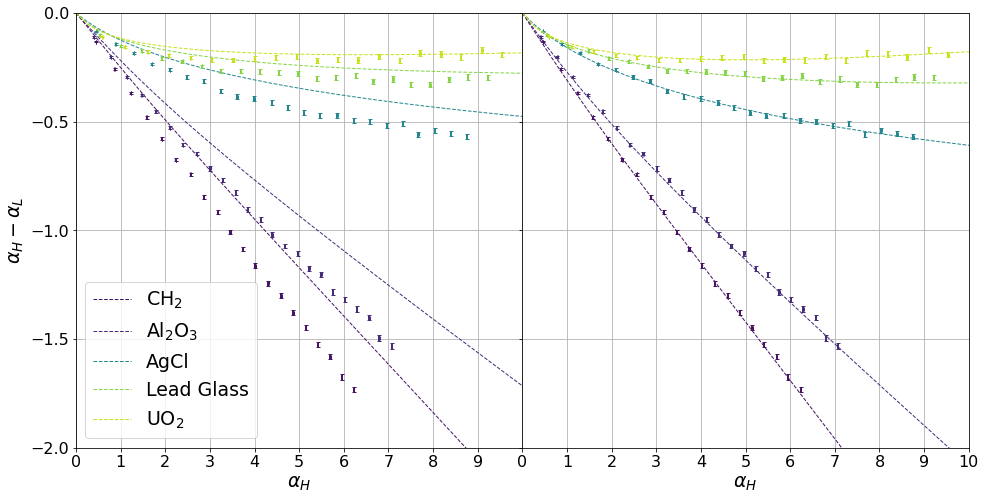

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [16, 8], sharey = True)
fig.subplots_adjust(wspace=0)

#for Z in Z_compound:
for Z in [101, 102, 103, 106, 107]:
    ### lookup simulated values
    lmbda_H, alpha_H, sigma_H = lookup_alpha[H][Z]
    lmbda_L, alpha_L, sigma_L = lookup_alpha[L][Z]
    ax1.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = compound_c[Z], ls='none')
    ax2.errorbar(alpha_H, alpha_H - alpha_L, xerr = sigma_H, 
                 yerr = np.sqrt(sigma_H**2 + sigma_L**2), 
                 elinewidth=2, capsize=2, ecolor = compound_c[Z], ls='none') 
        
    ### plot against theory
    alpha_H0 = np.array([calcCompoundAlpha(lmbda*compound_w[Z], compound_Z[Z], phi_H_twiddle, D_twiddle, mu_tot, Z_range) for lmbda in lmbda_range])
    alpha_L0 = np.array([calcCompoundAlpha(lmbda*compound_w[Z], compound_Z[Z], phi_L_twiddle, D_twiddle, mu_tot, Z_range) for lmbda in lmbda_range])
    ax1.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', color = compound_c[Z], label = compound_material[Z])
    
    alpha_H0 = np.array([calcCompoundAlpha(lmbda*compound_w[Z], compound_Z[Z], phi_H_twiddle, D_twiddle, mu_H, Z_range) for lmbda in lmbda_range])
    alpha_L0 = np.array([calcCompoundAlpha(lmbda*compound_w[Z], compound_Z[Z], phi_L_twiddle, D_twiddle, mu_L, Z_range) for lmbda in lmbda_range])
    ax2.plot(alpha_H0, alpha_H0 - alpha_L0, linewidth = 1, linestyle = 'dashed', color = compound_c[Z], label = compound_material[Z])
    
ax1.set_xlim(xrange)
ax2.set_xlim(xrange)
ax1.set_ylim(yrange)
ax1.set_xticks(xticks[:-1])
ax2.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.grid()
ax2.grid()
ax1.set_xlabel(r"$\alpha_H$", fontsize=19)
ax2.set_xlabel(r"$\alpha_H$", fontsize=19)
ax1.set_ylabel(r"$\alpha_H - \alpha_L$", fontsize=19)
ax1.legend(fontsize=19)

#plt.savefig(outfile + "alpha_curve_compound.pdf", bbox_inches = "tight")

### Testing trends in a, b, c

In [17]:
EE_arr = [5.5, 5.7, 6, 6.3, 6.5]

a_arr = np.zeros_like(EE_arr)
b_arr = np.zeros_like(EE_arr)
c_arr = np.zeros_like(EE_arr)

for i in range(len(EE_arr)):
    EE = EE_arr[i]
    phi_twiddle = np.load(path_data + "phi_%sMeV_10.npy" % EE)
    a, b, c = fitSemiempirical(alpha_L_calib, lmbda_L_calib, Z_arr_calib, phi_twiddle, D, mu_tot, mu_PE, mu_CS, mu_PP, Z_range)
    a_arr[i] = a
    b_arr[i] = b
    c_arr[i] = c

Minimum found at a = 0.7551, b = 0.9128, c = 1.1528 with a loss of 2.315e-13
Minimum found at a = 0.8263, b = 0.9355, c = 1.0841 with a loss of 1.025e-13
Minimum found at a = 0.9427, b = 0.9687, c = 0.9984 with a loss of 5.577e-10
Minimum found at a = 1.0738, b = 1.0022, c = 0.9263 with a loss of 2.839e-13
Minimum found at a = 1.1677, b = 1.0242, c = 0.8850 with a loss of 1.667e-14


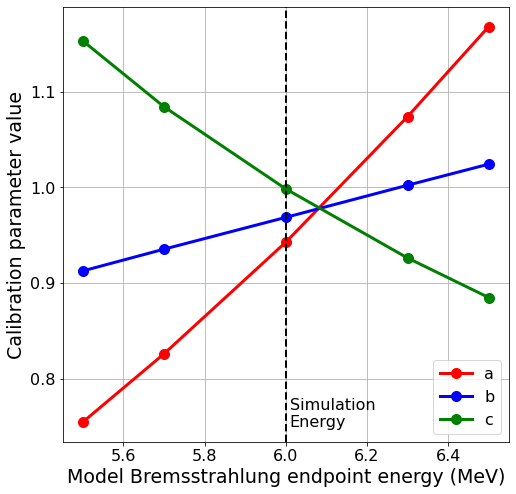

In [18]:
plt.figure(figsize=[8, 8])
plt.plot(EE_arr, a_arr, "o-", color = 'r', markersize=10, linewidth = 3, label = "a")
plt.plot(EE_arr, b_arr, "o-", color = 'b', markersize=10, linewidth = 3, label = "b")
plt.plot(EE_arr, c_arr, "o-", color = 'g', markersize=10, linewidth = 3, label = "c")
plt.axvline(x=6, color = 'k', linewidth = 2, linestyle = 'dashed')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.xlabel("Model Bremsstrahlung endpoint energy (MeV)", fontsize=19)
plt.ylabel("Calibration parameter value", fontsize=19)
plt.text(6.01, 0.75, "Simulation\nEnergy", fontsize=16)
plt.legend(fontsize=16)

### Beam Spectra Plots

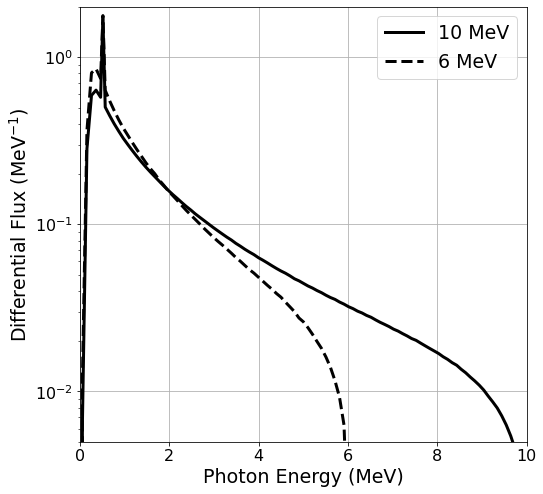

In [19]:
phi_10_linear = np.insert(np.load(path_data + "phi_10MeV_10_linear.npy"), 0, 0)
phi_6_linear = np.insert(np.load(path_data + "phi_6MeV_10_linear.npy"), 0, 0)
E_linear = np.insert(np.load(path_data + "E_10_linear.npy"), 0, 0)

plt.figure(figsize=[8, 8])
plt.plot(E_linear, phi_10_linear, color = 'k', linewidth = 3, label = "10 MeV")
plt.plot(E_linear, phi_6_linear, color = 'k', linewidth = 3, linestyle = "dashed", label = "6 MeV")
plt.semilogy()
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([5e-3, 2])
plt.xlim([0, 10])
plt.ylabel(r"Differential Flux (MeV${}^{-1}$)", fontsize = 19)
plt.xlabel("Photon Energy (MeV)", fontsize = 19)
plt.legend(fontsize=19)

plt.savefig(outfile + "brem_spectra.pdf", bbox_inches = "tight")

### Debug

In [ ]:
def readDat(filename):
    """Calculates the total energy deposited (and uncertainty) for filename"""
    line_number = 2 #skip header
    with open(filename) as f:
        header = np.array(f.readline().split())
        E_beam_idx = np.argmax(header == "E_beam(MeV)")
        E_incident_idx = np.argmax(header == "E_incident(MeV)")
        creator_process_idx = np.argmax(header == "CreatorProcessName")
        particle_name_idx = np.argmax(header == "ParticleName")
        for line in f:
            entries = line.split()
            E_beam = entries[E_beam_idx]
            E_incident = entries[E_incident_idx]
            creator_process = entries[creator_process_idx]
            particle_name = entries[particle_name_idx]         
            if creator_process != "EventGenerator":
                print("creator_process = %s; line %d" % (creator_process, line_number))
            elif E_beam != E_incident:
                print("Compton scatter: line %d" % line_number)
            line_number += 1
    
readDat("/Users/peter/Work/semiempirical_transparency/src/debug/E=10MeV-lmbda=100-Z=26-N=1000000.dat")

In [ ]:
def FreeStreaming(filename, N):
    """Calculates the total energy deposited (and uncertainty) for filename"""
    E_deposited = 0
    sigma_deposited = 0
    with open(filename) as f:
        header = np.array(f.readline().split())
        creator_process_idx = np.argmax(header == "CreatorProcessName")
        E_beam_idx = np.argmax(header == "E_beam(MeV)")
        E_incident_idx = np.argmax(header == "E_incident(MeV)")
        E_deposited_idx = np.argmax(header == "E_deposited(MeV)")
        idx_SHT = np.argmax(header == "IsSurfaceHitTrack")
        idx_EDTE = np.argmax(header == "IsEdepositedTotalEntry")
        for line in f:
            entries = line.split()
            if entries[idx_SHT] == "1":
                creator_process = entries[creator_process_idx]
                E_beam = entries[E_beam_idx]
                E_incident = entries[E_incident_idx]
                recordNextDepositedEvent = creator_process == "EventGenerator" and E_beam == E_incident
            if entries[idx_EDTE] == "1" and recordNextDepositedEvent:
                energy = float(entries[E_deposited_idx])
                E_deposited += energy
                sigma_deposited += energy**2
    E_deposited = E_deposited / N
    sigma_deposited = np.sqrt(sigma_deposited) / N
    return E_deposited, sigma_deposited

N = 1e6
debug_path = "/Users/peter/Work/semiempirical_transparency/src/debug2/"
E0, sigma0 = FreeStreaming(debug_path + "E=10MeV-lmbda=0-N=1000000.dat", N)
E6, sigma6 = FreeStreaming(debug_path + "E=10MeV-lmbda=50-Z=6-N=1000000.dat", N)
E26, sigma26 = FreeStreaming(debug_path + "E=10MeV-lmbda=50-Z=26-N=1000000.dat", N)
E82, sigma82 = FreeStreaming(debug_path + "E=10MeV-lmbda=50-Z=82-N=1000000.dat", N)

In [20]:
T6 = E6 / E0
s6 = T6 * np.sqrt((sigma6 / E6)**2 + (sigma0 / E0)**2)

T26 = E26 / E0
s26 = T26 * np.sqrt((sigma26 / E26)**2 + (sigma0 / E0)**2)

T82 = E82 / E0
s82 = T82 * np.sqrt((sigma82 / E82)**2 + (sigma0 / E0)**2)

T6_model = np.exp(-calcAlpha(50, [6], phi_H, D, mu_tot, Z_range))
T26_model = np.exp(-calcAlpha(50, [26], phi_H, D, mu_tot, Z_range))
T82_model = np.exp(-calcAlpha(50, [82], phi_H, D, mu_tot, Z_range))

print("Z=6: sim = %.5f +/- %.5f, model = %.5f" % (T6, s6, T6_model))
print("Z=26: sim = %.5f +/- %.5f, model = %.5f" % (T26, s26, T26_model))
print("Z=82: sim = %.5f +/- %.5f, model = %.5f" % (T82, s82, T82_model))

Z=6: sim = 0.17993 +/- 0.00098, model = 0.18082
Z=26: sim = 0.14757 +/- 0.00085, model = 0.14744
Z=82: sim = 0.08565 +/- 0.00060, model = 0.08656
